# Linear Regression Project

an Ecommerce company that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. Using python, and scikit-learn to analyze the customer data (it's fake, nota real credit card numbers or emails).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#reading the customers' data from Ecommerce Customers.csv
customers = pd.read_csv('Ecommerce Customers')
customers.head()
customers.describe()
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


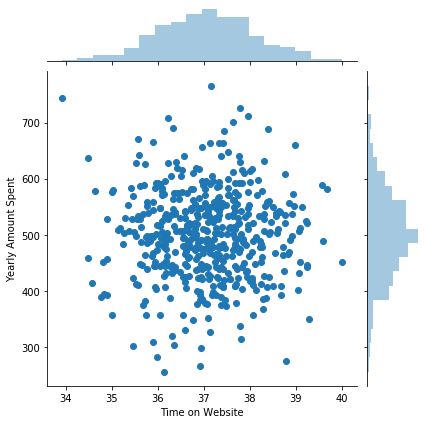

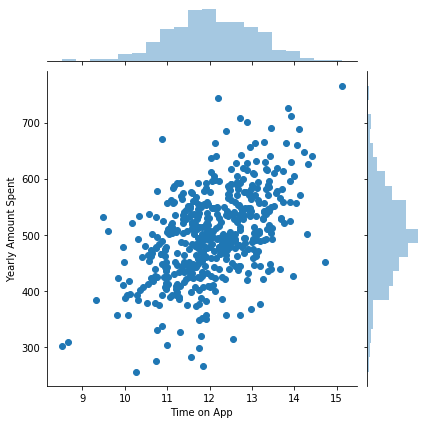

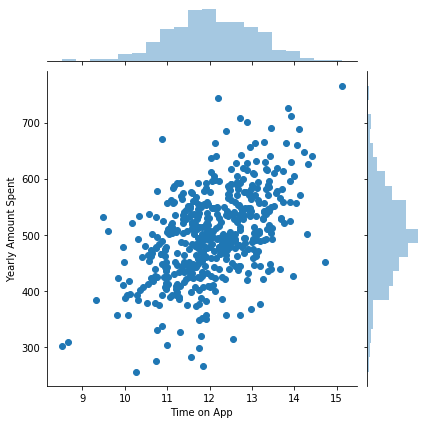

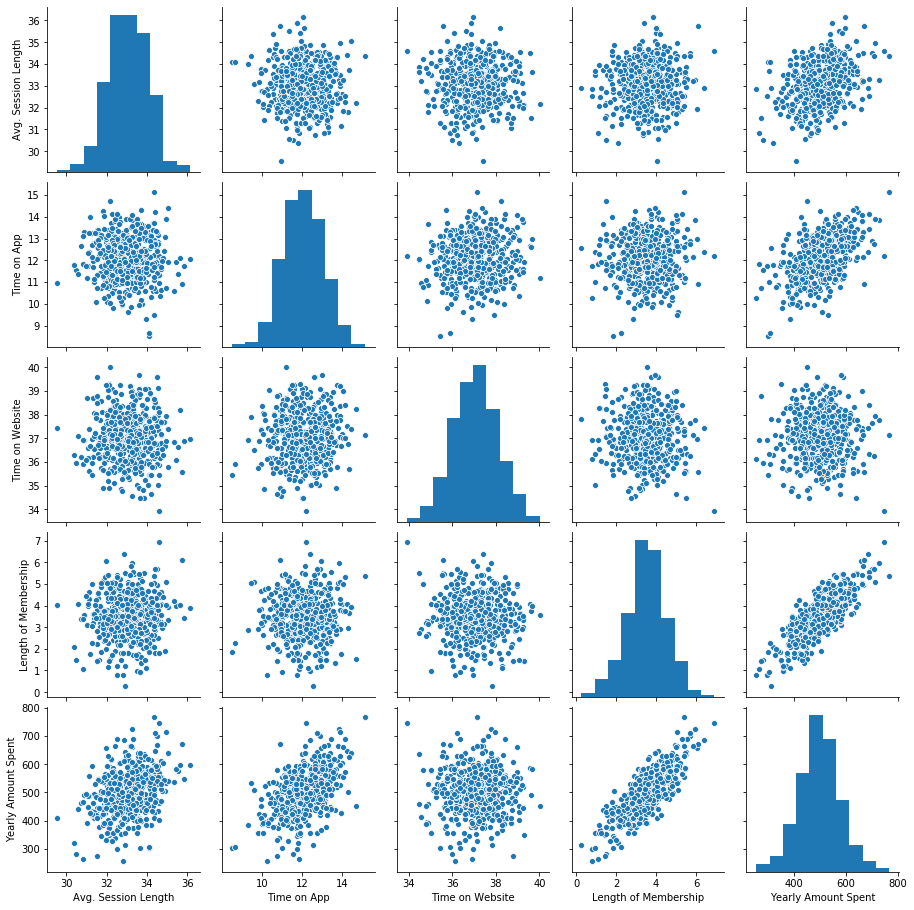

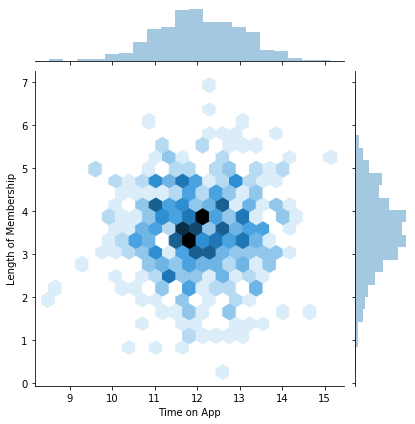

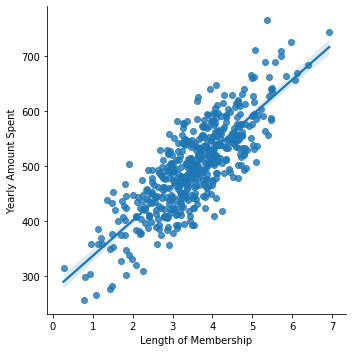

In [2]:
#plotting specific customers' values
sns.jointplot(customers['Time on Website'],customers['Yearly Amount Spent'])
sns.jointplot(data= customers, x ='Time on App', y = 'Yearly Amount Spent')
sns.jointplot(customers['Time on App'],customers['Yearly Amount Spent'])
sns.pairplot(customers)
sns.jointplot(x= 'Time on App', y = 'Length of Membership', kind = "hex", data = customers)
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data= customers)




In [3]:
#deviding the data into features and target
customers.columns
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']] #Features
y = customers['Yearly Amount Spent'] #what we try to predict


#using scikit-learn library to train_test_split data randomly
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)


#fitting our model on the trained data
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
print ('coefficients:\n', lm.coef_)




coefficients:
 [25.98154972 38.59015875  0.19040528 61.27909654]


Text(0, 0.5, 'Predicted Values')

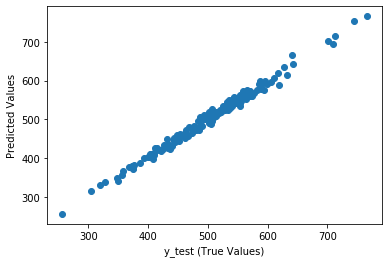

In [4]:
#plotting the predictions vs. the true values
plt.scatter(y_test,predictions)
plt.xlabel('y_test (True Values)')
plt.ylabel('Predicted Values')




MAE:  7.228148653430855
MSE:  79.81305165097481
RMSE:  8.933815066978655
EVS: 0.9890771231889607


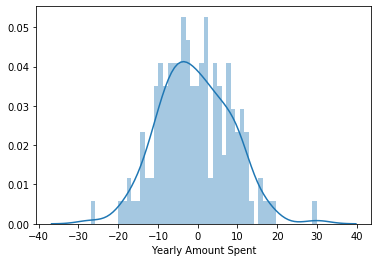

In [5]:
# printing out the MAE, MSE, RMSE, and the explained variance score

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('EVS:',explained_variance_score(y_test,predictions))

#plotting the risduals
sns.distplot((y_test - predictions), bins =50) # risduals



In [9]:
# which feature is effecting the Yearly Amount Spent the most ?
coefficients = pd.DataFrame(data = lm.coef_, index = X.columns, columns = ['Coeff'])

print(coefficients)


                          Coeff
Avg. Session Length   25.981550
Time on App           38.590159
Time on Website        0.190405
Length of Membership  61.279097
